In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
income = pd.read_csv('../grouped_income_check.csv')

In [37]:
income_by_age = pd.read_csv('../income_by_teen.csv')
income_by_age_YA = pd.read_csv('../YA/income_by_age_CPI_adjusted.csv')

In [31]:
income_by_age.columns

Index(['income_18', 'income_19', 'income_20', 'income_21', 'income_22',
       'income_23', 'income_24', 'income_25', 'income_26', 'income_27',
       'income_28', 'income_29', 'income_30', 'income_31', 'income_32',
       'income_33', 'income_34', 'income_35', 'income_36', 'income_37',
       'income_38', 'income_39', 'income_40', 'income_41', 'income_42',
       'income_43', 'income_44', 'income_45', 'income_46', 'income_47',
       'income_48', 'income_49', 'income_50', 'income_51', 'income_52',
       'income_53', 'income_54', 'income_55', 'income_56', 'income_57',
       'income_58', 'income_59', 'income_60', 'income_61', 'income_62',
       'teen_mom', 'teen_dad', 'teen_mom_not_teen_dad',
       'teen_dad_not_teen_mom', 'teen_dad_and_teen_mom'],
      dtype='object')

In [40]:
income_use = income_by_age.drop(columns=['teen_mom', 'teen_dad', 'teen_mom_not_teen_dad',
       'teen_dad_not_teen_mom', 'teen_dad_and_teen_mom'])
income_by_age_YA = income_by_age_YA.drop(columns=['code', 'birthyear'])

In [41]:
counts = income_use.count().reset_index()
counts_YA = income_by_age_YA.count().reset_index()

In [44]:
counts['index'] = np.arange(18, 63)

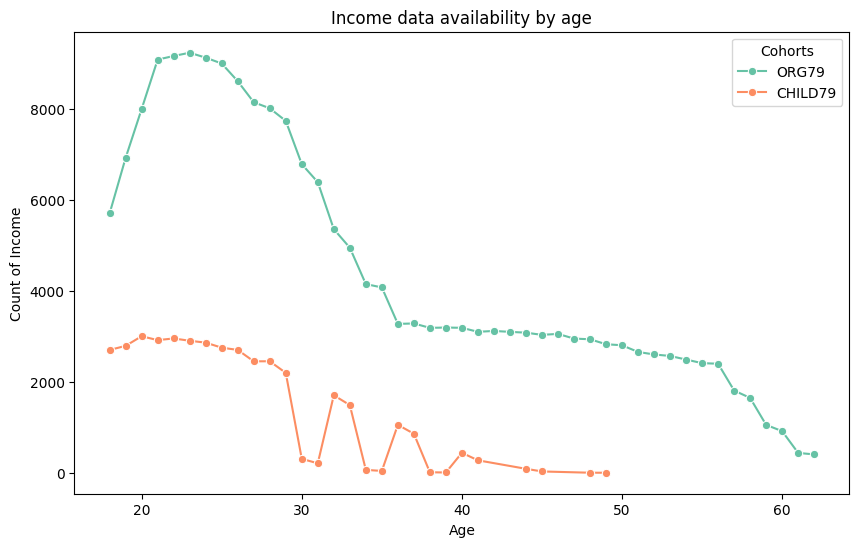

In [65]:
counts['source'] = 'ORG79'
counts_YA['source'] = 'CHILD79'

# Combine DataFrames
df_combined = pd.concat([counts, counts_YA])

# Plotting with Seaborn
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_combined, x='index', y=0, hue='source', palette='Set2', marker='o')

plt.xlabel('Age')
plt.ylabel('Count of Income')
plt.title('Income data availability by age')
plt.legend(title='Cohorts')
plt.show()

In [94]:
YA_average = income_by_age_YA.mean().reset_index()
YA_average.rename(columns={'index': 'year', 0: 'income'}, inplace=True)

In [95]:
average = income.groupby('year')['income'].mean().reset_index()

In [96]:
average.head()

,year,income
0,18,7322.485323
1,19,10070.664891
2,20,12911.654852
3,21,14843.375137
4,22,16982.112163


In [97]:
YA_average.head()

,year,income
0,18,6017.168786
1,19,8746.879432
2,20,11137.984961
3,21,13818.453399
4,22,17466.950777


In [106]:
average['source'] = 'ORG79'
YA_average['source'] = 'CHILD79'

YA_average['year'] = pd.to_numeric(YA_average['year'], errors='coerce')
# YA_average = YA_average[(YA_average['year'] >= 18) & (YA_average['year'] <= 30)] # only interested in the most abundant information section


In [107]:

# Combine DataFrames
df_combined = pd.concat([average, YA_average])
df_combined['year'] = pd.to_numeric(df_combined['year'], errors='coerce')
df_filtered = df_combined[(df_combined['year'] >= 18) & (df_combined['year'] <= 30)] # only interested in the most abundant information section


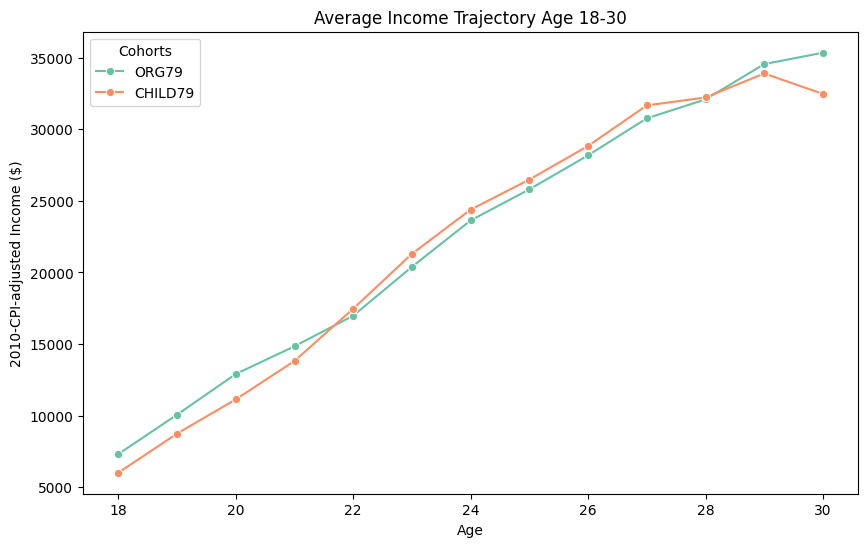

In [110]:

# Plotting with Seaborn
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_filtered, x='year', y='income', hue='source', palette='Set2', marker='o')

plt.xlabel('Age')
plt.ylabel('2010-CPI-adjusted Income ($)')
plt.title('Average Income Trajectory Age 18-30')
plt.legend(title='Cohorts')
plt.show()

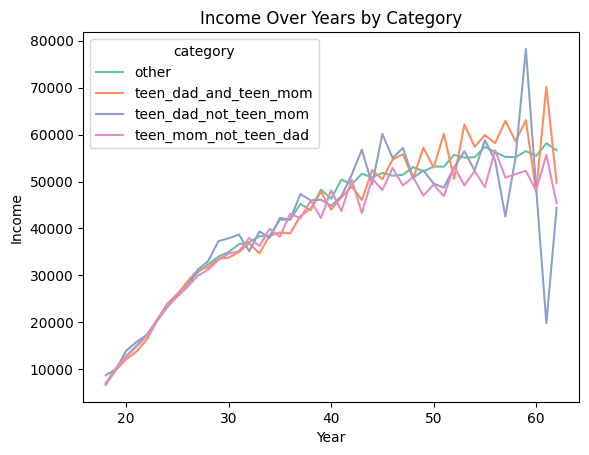

In [6]:
sns.lineplot(x='year', y='income', hue='category', data=income, palette='Set2')

# Set labels and title for better understanding
plt.xlabel('Year')
plt.ylabel('Income')
plt.title('Income Over Years by Category')

# Show the plot
plt.show()

/var/folders/mq/_l2nmp6s2lv4lstvhswgymv00000gn/T/ipykernel_72838/819365383.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='year', y='income', data=df, palette='Set2')


<Axes: xlabel='year', ylabel='income'>

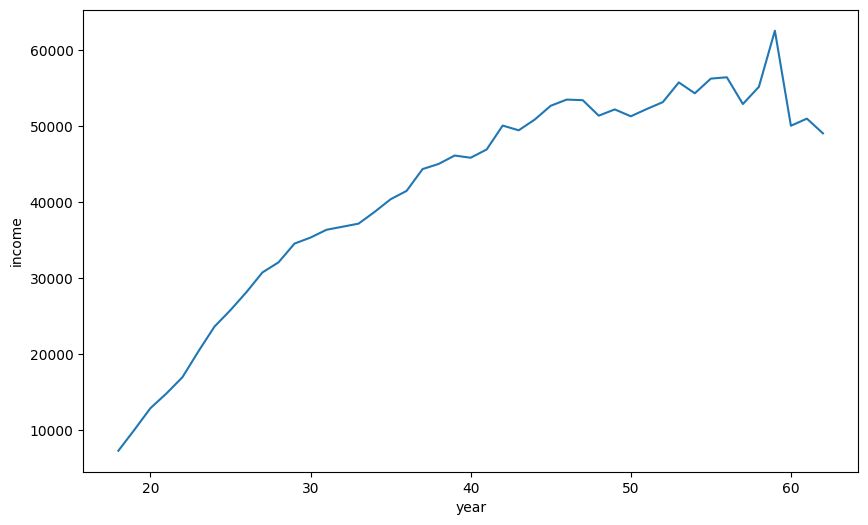